# Infnet
## Etapa 09 - Work with dataset Wine
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
* https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [0]:
# Program to load Wine Dataset
# Load useful libraries
import pandas as pd
# Configuring pandas to show all features
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [0]:
from sklearn.datasets import load_wine
# Loading dataset
data = load_wine()
print("Target:",list(data.target_names))
data['feature_names']
#data

Target: ['class_0', 'class_1', 'class_2']
Out[133]: ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# Exploratory Data Analysis
* https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [0]:
# Converting data to a dataframe to view properly
wine = pd.DataFrame(data=data['data'],columns=data['feature_names'])
# Inclui Target
wine["target"] = data.target
# Printing first 5 observations
wine.head()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 od280/od315_of_diluted_wines 
 proline 
 target 
 
 
 
 
 0 
 14.23 
 1.71 
 2.43 
 15.6 
 127.0 
 2.80 
 3.06 
 0.28 
 2.29 
 5.64 
 1.04 
 3.92 
 1065.0 
 0 
 
 
 1 
 13.20 
 1.78 
 2.14 
 11.2 
 100.0 
 2.65 
 2.76 
 0.26 
 1.28 
 4.38 
 1.05 
 3.40 
 1050.0 
 0 
 
 
 2 
 13.16 
 2.36 
 2.67 
 18.6 
 101.0 
 2.80 
 3.24 
 0.30 
 2.81 
 5.68 
 1.03 
 3.17 
 1185.0 
 0 
 
 
 3 
 14.37 
 1.95 
 2.50 
 16.8 
 113.0 
 3.85 
 3.49 
 0.24 
 2.18 
 7.80 
 0.86 
 3.45 
 1480.0 
 0 
 
 
 4 
 13.24 
 2.59 
 2.87 
 21.0 
 118.0 
 2.80 
 2.69 
 0.39 
 1.82 
 4.32 
 1.04 
 2.93 
 735.0 
 0

In [0]:
wine.shape # Quantidade de obervações e features

Out[135]: (178, 14)

In [0]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [0]:
# Rename Column
wine.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True) 

In [0]:
# Verifica quantidade de observações duplicadas
wine.duplicated().sum()

Out[138]: 0

In [0]:
# Realiza contagem por tipo de target para avaliar a distribuição
wine.target.value_counts()
# You can also express the data as a percentage by passing normalize = True
#wine.target.value_counts(normalize = True)*100

Out[142]: 1    39.887640
0    33.146067
2    26.966292
Name: target, dtype: float64

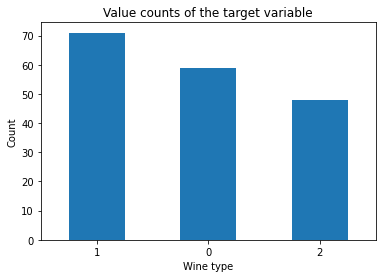

In [0]:
wine.target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [0]:
# https://www.turing.com/kb/calculating-skewness-and-kurtosis-in-python
# https://medium.com/omics-diary/how-to-test-normality-skewness-and-kurtosis-using-python-18fb2d8e35b9
print(f"Skewness (distroção): {wine['magnesium'].skew()}")
print(f"Kurtosis (assimetria e curtose): {wine['magnesium'].kurt()}")

Skewness (distroção): 1.098191054755161
Kurtosis (assimetria e curtose): 2.1049913235905557


Out[145]: Text(0.5, 1.0, 'Histogram and KDE')

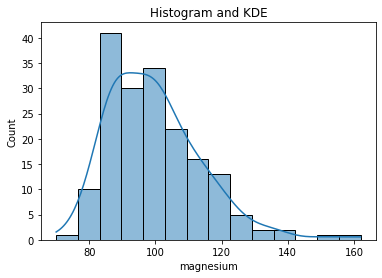

In [0]:
# https://medium.com/omics-diary/how-to-test-normality-skewness-and-kurtosis-using-python-18fb2d8e35b9
fig, ax = plt.subplots()
sns.histplot(data=wine, x="magnesium", kde=True)
ax.set_title("Histogram and KDE")

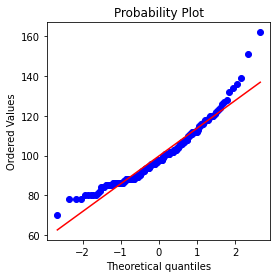

In [0]:
from scipy import stats
fig, (ax) = plt.subplots(figsize = (4,4))
res = stats.probplot(wine["magnesium"],dist="norm", plot=ax)

In [0]:
# skewness along the index axis
wine.skew(axis = 0, skipna = True)

Out[73]: alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
target                          0.107431
dtype: float64

In [0]:
# Estatísticas descritivas básicas
wine.describe()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 protein_concentration 
 proline 
 
 
 
 
 count 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 178.000000 
 
 
 mean 
 13.000618 
 2.336348 
 2.366517 
 19.494944 
 99.741573 
 2.295112 
 2.029270 
 0.361854 
 1.590899 
 5.058090 
 0.957449 
 2.611685 
 746.893258 
 
 
 std 
 0.811827 
 1.117146 
 0.274344 
 3.339564 
 14.282484 
 0.625851 
 0.998859 
 0.124453 
 0.572359 
 2.318286 
 0.228572 
 0.709990 
 314.907474 
 
 
 min 
 11.030000 
 0.740000 
 1.360000 
 10.600000 
 70.000000 
 0.980000 
 0.340000 
 0.130000 
 0.410000 
 1.280000 
 0.480000 
 1.270000 
 278.000000 
 
 
 25% 
 12.362500 
 1.602500 
 2.210000 
 17.200000 
 88.000000 
 1.742500 
 1.205000 
 0.270000 
 1.250000 
 3.220000 
 0.782500 
 1.937500 
 500.500000 
 
 
 50% 
 13.050000 
 1.865000 
 2.360000 
 19.500000 
 98.000000 
 2.355000 
 2.135000 
 0.340000 
 1.555000 
 4.690000 
 0.965000 
 2.780000 
 673.500000 
 
 
 75% 
 13.677500 
 3.082500 
 2.557500 
 21.500000 
 107.000000 
 2.800000 
 2.875000 
 0.437500 
 1.950000 
 6.200000 
 1.120000 
 3.170000 
 985.000000 
 
 
 max 
 14.830000 
 5.800000 
 3.230000 
 30.000000 
 162.000000 
 3.880000 
 5.080000 
 0.660000 
 3.580000 
 13.000000 
 1.710000 
 4.000000 
 1680.000000

In [0]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (15, 8)


In [0]:
wine.corr()

alcohol 
 malic_acid 
 ash 
 alcalinity_of_ash 
 magnesium 
 total_phenols 
 flavanoids 
 nonflavanoid_phenols 
 proanthocyanins 
 color_intensity 
 hue 
 protein_concentration 
 proline 
 target 
 
 
 
 
 alcohol 
 1.000000 
 0.094397 
 0.211545 
 -0.310235 
 0.270798 
 0.289101 
 0.236815 
 -0.155929 
 0.136698 
 0.546364 
 -0.071747 
 0.072343 
 0.643720 
 -0.328222 
 
 
 malic_acid 
 0.094397 
 1.000000 
 0.164045 
 0.288500 
 -0.054575 
 -0.335167 
 -0.411007 
 0.292977 
 -0.220746 
 0.248985 
 -0.561296 
 -0.368710 
 -0.192011 
 0.437776 
 
 
 ash 
 0.211545 
 0.164045 
 1.000000 
 0.443367 
 0.286587 
 0.128980 
 0.115077 
 0.186230 
 0.009652 
 0.258887 
 -0.074667 
 0.003911 
 0.223626 
 -0.049643 
 
 
 alcalinity_of_ash 
 -0.310235 
 0.288500 
 0.443367 
 1.000000 
 -0.083333 
 -0.321113 
 -0.351370 
 0.361922 
 -0.197327 
 0.018732 
 -0.273955 
 -0.276769 
 -0.440597 
 0.517859 
 
 
 magnesium 
 0.270798 
 -0.054575 
 0.286587 
 -0.083333 
 1.000000 
 0.214401 
 0.195784 
 -0.256294 
 0.236441 
 0.199950 
 0.055398 
 0.066004 
 0.393351 
 -0.209179 
 
 
 total_phenols 
 0.289101 
 -0.335167 
 0.128980 
 -0.321113 
 0.214401 
 1.000000 
 0.864564 
 -0.449935 
 0.612413 
 -0.055136 
 0.433681 
 0.699949 
 0.498115 
 -0.719163 
 
 
 flavanoids 
 0.236815 
 -0.411007 
 0.115077 
 -0.351370 
 0.195784 
 0.864564 
 1.000000 
 -0.537900 
 0.652692 
 -0.172379 
 0.543479 
 0.787194 
 0.494193 
 -0.847498 
 
 
 nonflavanoid_phenols 
 -0.155929 
 0.292977 
 0.186230 
 0.361922 
 -0.256294 
 -0.449935 
 -0.537900 
 1.000000 
 -0.365845 
 0.139057 
 -0.262640 
 -0.503270 
 -0.311385 
 0.489109 
 
 
 proanthocyanins 
 0.136698 
 -0.220746 
 0.009652 
 -0.197327 
 0.236441 
 0.612413 
 0.652692 
 -0.365845 
 1.000000 
 -0.025250 
 0.295544 
 0.519067 
 0.330417 
 -0.499130 
 
 
 color_intensity 
 0.546364 
 0.248985 
 0.258887 
 0.018732 
 0.199950 
 -0.055136 
 -0.172379 
 0.139057 
 -0.025250 
 1.000000 
 -0.521813 
 -0.428815 
 0.316100 
 0.265668 
 
 
 hue 
 -0.071747 
 -0.561296 
 -0.074667 
 -0.273955 
 0.055398 
 0.433681 
 0.543479 
 -0.262640 
 0.295544 
 -0.521813 
 1.000000 
 0.565468 
 0.236183 
 -0.617369 
 
 
 protein_concentration 
 0.072343 
 -0.368710 
 0.003911 
 -0.276769 
 0.066004 
 0.699949 
 0.787194 
 -0.503270 
 0.519067 
 -0.428815 
 0.565468 
 1.000000 
 0.312761 
 -0.788230 
 
 
 proline 
 0.643720 
 -0.192011 
 0.223626 
 -0.440597 
 0.393351 
 0.498115 
 0.494193 
 -0.311385 
 0.330417 
 0.316100 
 0.236183 
 0.312761 
 1.000000 
 -0.633717 
 
 
 target 
 -0.328222 
 0.437776 
 -0.049643 
 0.517859 
 -0.209179 
 -0.719163 
 -0.847498 
 0.489109 
 -0.499130 
 0.265668 
 -0.617369 
 -0.788230 
 -0.633717 
 1.000000

# Correlação com Heatmap - Biblioteca  Seaborn
* https://towardsdatascience.com/seaborn-heatmap-for-visualising-data-correlations-66cbef09c1fe

Out[154]: <AxesSubplot:>

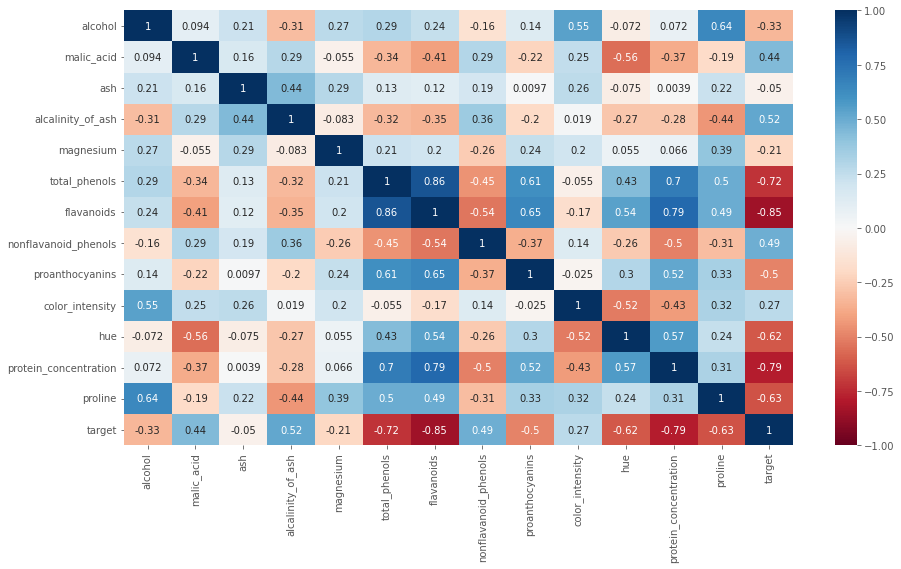

In [0]:
import seaborn as sns
#sns.heatmap(wine.corr())
#sns.heatmap(wine.corr(), cmap='YlOrBr') #RdBu
#sns.heatmap(wine.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.heatmap(wine.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)

Out[155]: <AxesSubplot:>

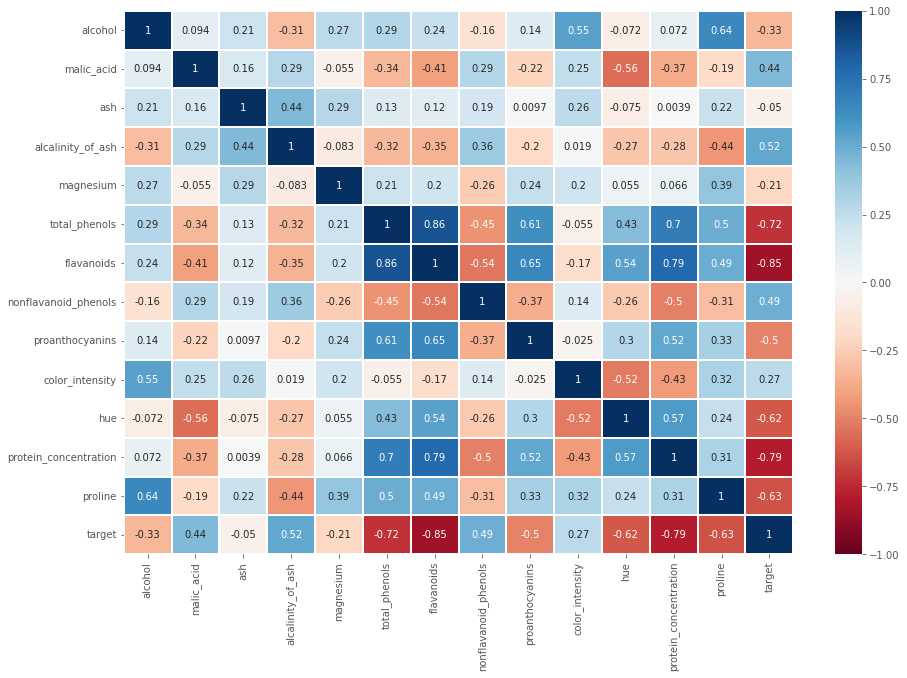

In [0]:
# https://www.statology.org/seaborn-heatmap-size/
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))

#create heatmap
sns.heatmap(wine.corr(), linewidths=.3, cmap='RdBu', annot=True,  vmin=-1, vmax=1)

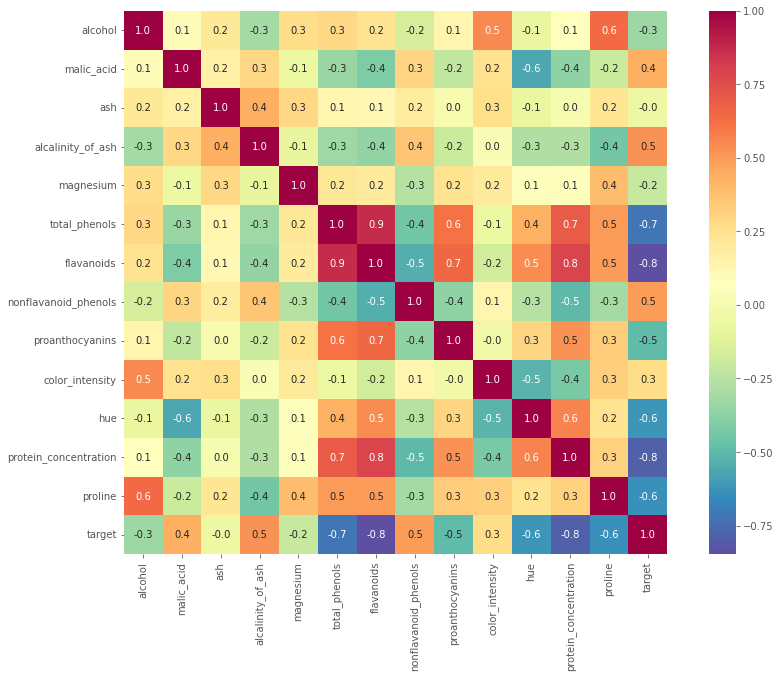

In [0]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(wine.corr(), 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.1f', # 1 casa decimal 
                 annot_kws={'size': 10}, 
                 yticklabels=wine.columns, 
                 xticklabels=wine.columns, 
                 cmap="Spectral_r")
plt.show()

Out[157]: <seaborn.axisgrid.PairGrid at 0x7f9e74728cd0>

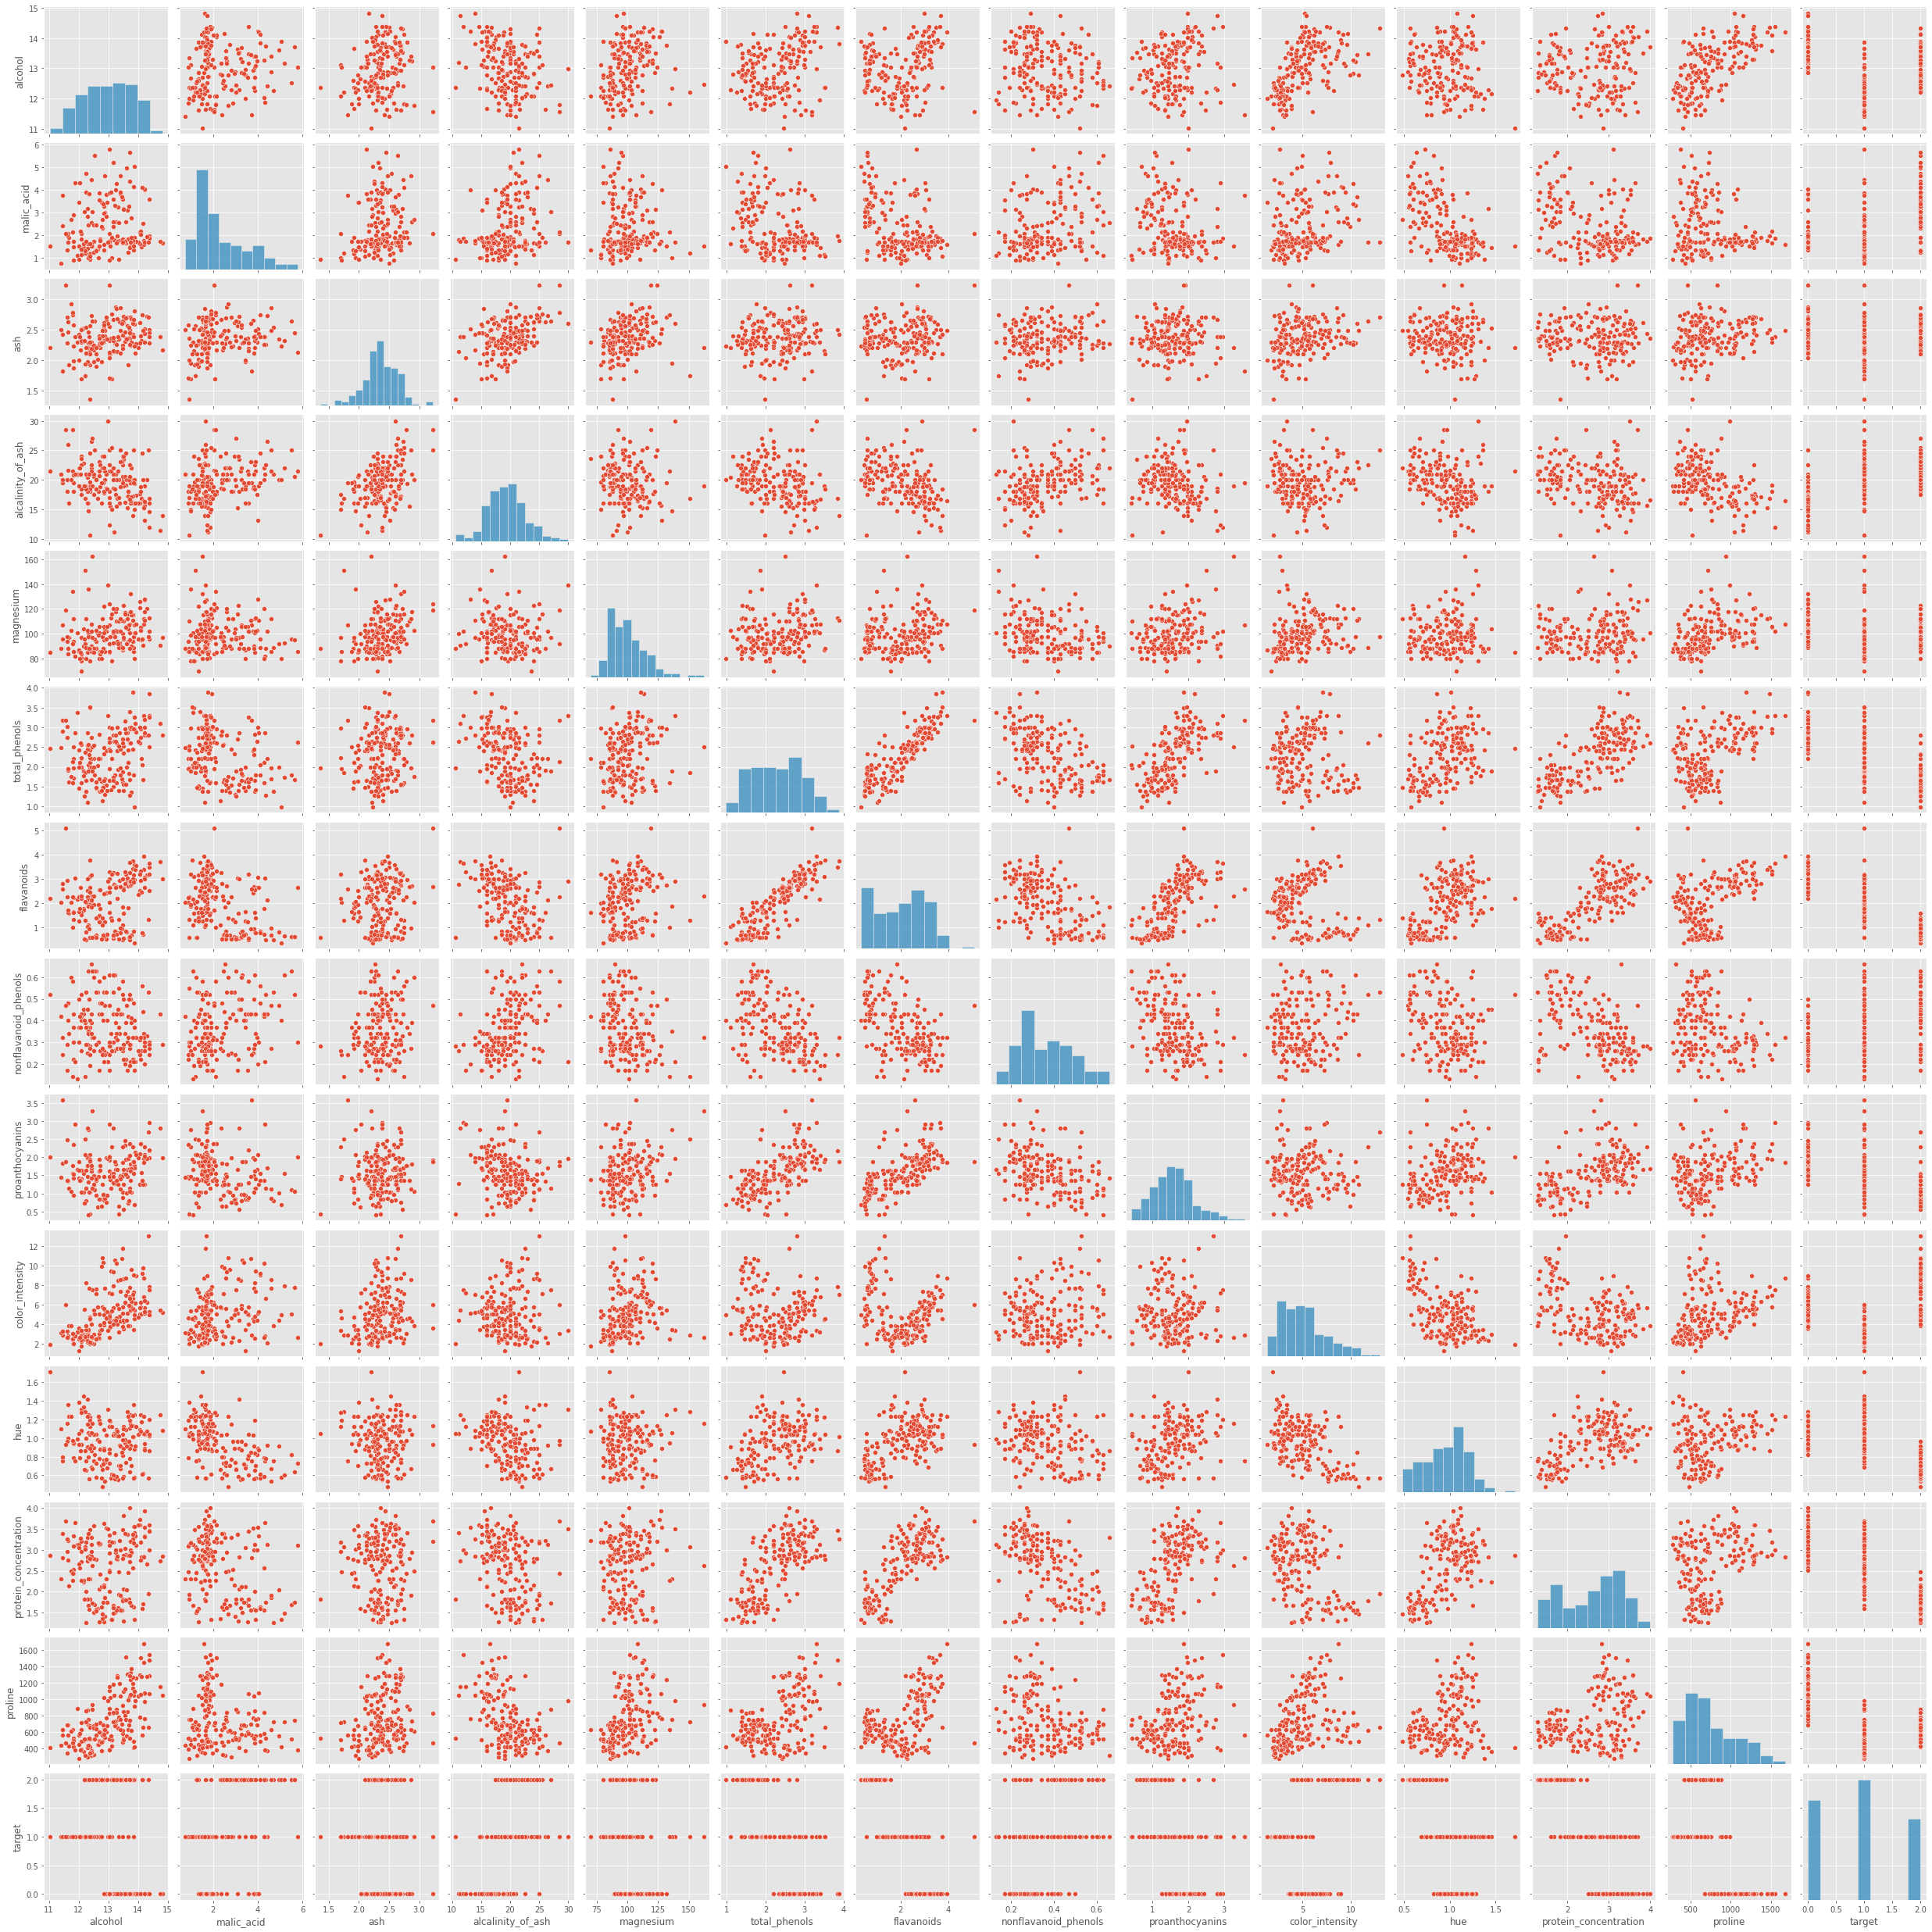

In [0]:
# Pairplot - Dispersão entre as variáveis
sns.pairplot(wine)

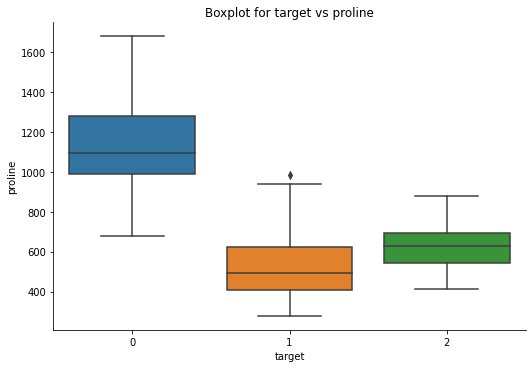

In [0]:
sns.catplot(x="target", y="proline", data=wine, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

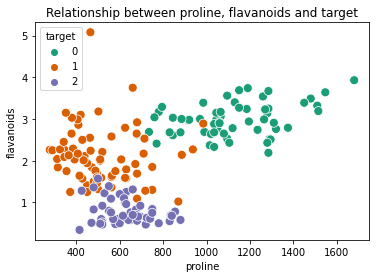

In [0]:
sns.scatterplot(x="proline", y="flavanoids", hue="target", data=wine, palette="Dark2", s=80)
plt.title("Relationship between proline, flavanoids and target")
plt.show()

# Detecção de outlier
* https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html#sphx-glr-auto-examples-applications-plot-outlier-detection-wine-py
* https://www.topinvest.com.br/covariancia-correlacao-e-coeficiente-de-determinacao
* https://www.suno.com.br/artigos/covariancia

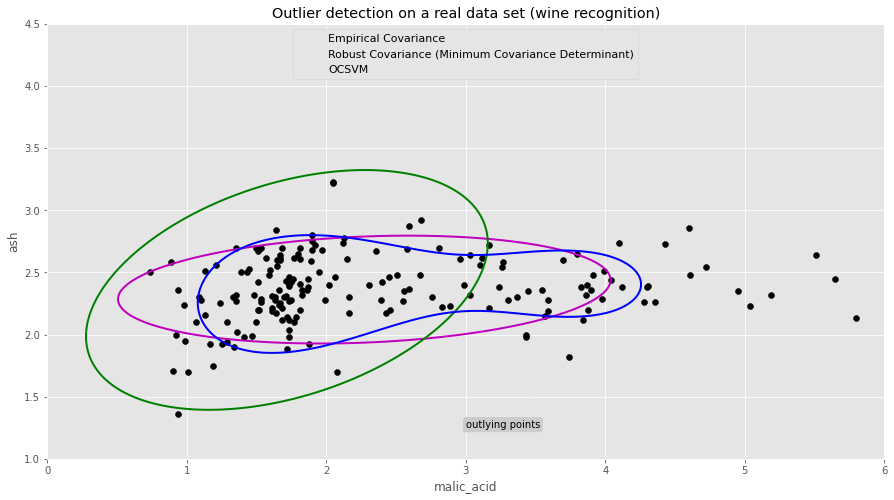

In [0]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

#np.meshgrid  -- https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1) # Treinamento
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

# ROC Curve
* https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py

In [0]:
# Carregar dados e treinar um SVC
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Out[91]: SVC(random_state=42)

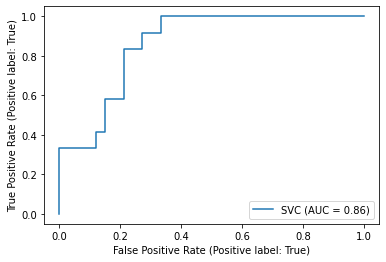

In [0]:
# Plotando a Curva ROC
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

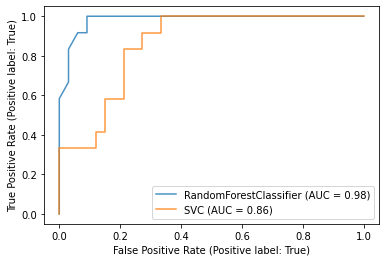

In [0]:
# Treinando uma Floresta Aleatória e Traçando a Curva ROC 
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [0]:
# https://www.kaggle.com/code/kanikar/wine-quality-prediction-using-pca-lasso-and-ridge/notebook
print("% of missing values in data\n")
for column in wine.columns:
    print("{}: {}%".format(column,np.round(wine[column].isna().sum()/wine[column].count(),4)*100))

% of missing values in data

alcohol: 0.0%
malic_acid: 0.0%
ash: 0.0%
alcalinity_of_ash: 0.0%
magnesium: 0.0%
total_phenols: 0.0%
flavanoids: 0.0%
nonflavanoid_phenols: 0.0%
proanthocyanins: 0.0%
color_intensity: 0.0%
hue: 0.0%
od280/od315_of_diluted_wines: 0.0%
proline: 0.0%
target: 0.0%


# Préprocessamento

In [0]:
df = wine
from sklearn.model_selection import train_test_split

y = dataset['target']  # Define o alvo
X = dataset.drop('target', axis=1) # Remove coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [0]:
# Em spark: https://spark.apache.org/docs/latest/ml-features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# K-Fold: https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/
fold = KFold(n_splits = 5, random_state=1, shuffle=True)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

Out[162]: LinearRegression()

In [0]:
lm_scores = -1 * cross_val_score(linear_model,
                                X_train,
                                y_train,
                                cv=fold,
                                scoring='neg_root_mean_squared_error')
lm_scores

Out[163]: array([0.31986529, 0.24833367, 0.28114004, 0.29409252, 0.24169484])

In [0]:
lm_train_score = np.mean(lm_scores)
lm_train_score

Out[164]: 0.27702527212273037

In [0]:
y_pred = linear_model.predict(X_test)
lm_test_score = mean_squared_error(y_test, y_pred, squared=False)
lm_test_score

Out[165]: 0.25606453792400924

In [0]:
r2 = r2_score(y_test, y_pred)
r2

Out[166]: 0.8941749867165899

In [0]:
# Lasso Regression (L1 Regularization)
l1_model = LassoCV()
l1_model.fit(X_train, y_train)
l1_scores = -1 * cross_val_score(l1_model,
                                X_train,
                                y_train,
                                cv = fold,
                                scoring = 'neg_root_mean_squared_error')
l1_scores

Out[167]: array([0.31967025, 0.25299256, 0.29020141, 0.28753811, 0.23491183])

In [0]:
l1_train_score = np.mean(l1_scores)
l1_train_score

Out[168]: 0.2770628322844098

In [0]:
y_pred = l1_model.predict(X_test)
l1_test_score = mean_squared_error(y_test, y_pred, squared=False)
l1_test_score

Out[169]: 0.2570356098812374

In [0]:
r2 = r2_score(y_test, y_pred)
r2

Out[170]: 0.8933708257134029

In [0]:
l2_model = RidgeCV()
l2_model.fit(X_train, y_train)
l2_scores = -1 * cross_val_score(l2_model,
                                X_train,
                                y_train,
                                cv = fold,
                                scoring = 'neg_root_mean_squared_error')
l2_scores

Out[171]: array([0.32787003, 0.25356405, 0.28990505, 0.28230605, 0.24241569])

In [0]:
l2_train_score = np.mean(l2_scores)
l2_train_score

Out[172]: 0.27921217497977036

In [0]:
y_pred = l2_model.predict(X_test)
l2_test_score = mean_squared_error(y_test, y_pred, squared=False)
l2_test_score

Out[173]: 0.2570276748633355

In [0]:
r2 = r2_score(y_test, y_pred)
r2

Out[174]: 0.8933774091696567

In [0]:
from sklearn.decomposition import PCA # Redução de dimensionalidade

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.explained_variance_ratio_

Out[175]: array([0.35713647, 0.21460773, 0.12381706, 0.07733743, 0.0618006 ,
       0.04901835, 0.02974046, 0.0260727 , 0.02095354, 0.01676152,
       0.01416664, 0.0085875 ])

In [0]:
rmse_list = []
for i in range(1, X_train_pca.shape[1]+1):
    rmse_score = -1 * cross_val_score(linear_model,
                                     X_train_pca[:,:i],
                                     y_train,
                                     cv = fold,
                                     scoring = 'neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

rmse_list

Out[176]: [0.33457743346668234,
 0.34110833581643285,
 0.3400987166175452,
 0.3363897112739152,
 0.3386703151505669,
 0.29180156787964073,
 0.2922346221856319,
 0.2831667273142887,
 0.2818824673975139,
 0.28155754674859834,
 0.2841911073136204,
 0.2770252721227305]

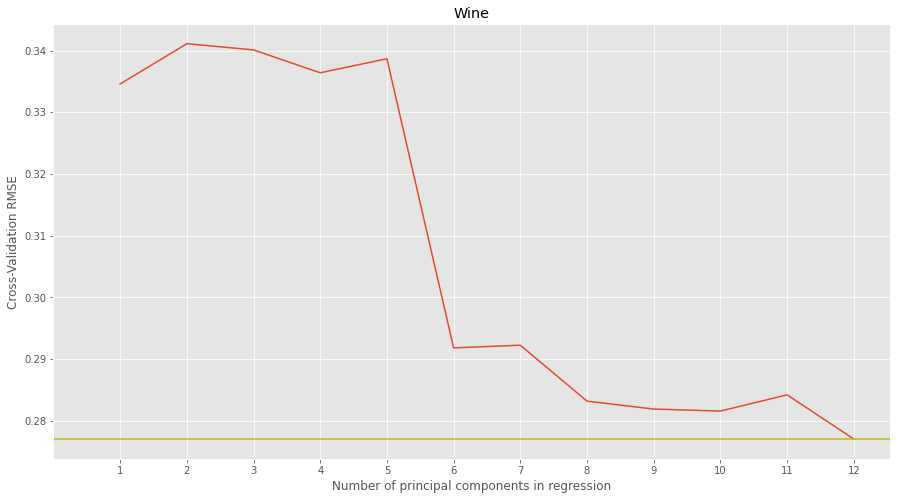

In [0]:
import matplotlib.pyplot as plt

plt.plot(rmse_list)
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Wine')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pca.shape[1]), np.arange(1, X_train_pca.shape[1]+1))
plt.axhline(y=lm_train_score, color='y', linestyle='-');

In [0]:
optimal_pc_num = 9
lm_pc_model = LinearRegression()
lm_pc_model.fit(X_train_pca[:,:optimal_pc_num], y_train)
lm_pc_scores = -1 * cross_val_score(lm_pc_model,
                                   X_train_pca[:,:optimal_pc_num],
                                   y_train,
                                   cv = fold, 
                                   scoring = 'neg_root_mean_squared_error')
lm_pc_scores

Out[178]: array([0.33913621, 0.28335436, 0.29147484, 0.23859562, 0.2568513 ])

In [0]:
lm_pc_train_score = np.mean(lm_pc_scores)
lm_pc_train_score

Out[179]: 0.2818824673975139

In [0]:
y_pred = lm_pc_model.predict(X_test_pca[:,:optimal_pc_num])
lm_pc_test_score = mean_squared_error(y_test, y_pred, squared=False)
lm_pc_test_score

Out[180]: 0.2858421832806386

In [0]:
r2 = r2_score(y_test, y_pred)
r2

Out[181]: 0.8681311869857232

# Different Model Comparison

In [0]:
train_metrics = np.array([round(lm_train_score,4),
                         round(l1_train_score,4),
                         round(l2_train_score,4),
                         round(lm_pc_train_score,4)])
train_metrics = pd.DataFrame(train_metrics, columns=['Train Data MSE'])
train_metrics.index = ['Linear Regression',
                      'Lasso Regression',
                      'Ridge Regression',
                      f'PC Regression({optimal_pc_num} PC)']
train_metrics

Train Data MSE 
 
 
 
 
 Linear Regression 
 0.2770 
 
 
 Lasso Regression 
 0.2771 
 
 
 Ridge Regression 
 0.2792 
 
 
 PC Regression(9 PC) 
 0.2819

In [0]:
test_metrics = np.array([round(lm_test_score,4),
                        round(l1_test_score,4),
                        round(l2_test_score,4),
                        round(lm_pc_test_score,4)])
test_metrics = pd.DataFrame(test_metrics, columns=['Test Data MSE'])
test_metrics.index = ['Linear Regression',
                     'Lasso Regression',
                     'Ridge Regression',
                     f'PC Regression({optimal_pc_num})']
test_metrics

Test Data MSE 
 
 
 
 
 Linear Regression 
 0.2561 
 
 
 Lasso Regression 
 0.2570 
 
 
 Ridge Regression 
 0.2570 
 
 
 PC Regression(9) 
 0.2858